weather report






In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
import statsmodels.api as sm 
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'r', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') #dropna() is used to remove the row or column that has Nan value 
    df = df[[col for col in df if df[col].nunique() > 1]] #nunique() is used to find the the unique number of data present in the column
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k') #facecolour is the background of the graph
    corrMat = plt.matshow(corr, fignum = 1) #matshow will produce the matrix in tabular form
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    
    
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()



In [7]:
weather_df = pd.read_csv('weather.csv')

In [8]:
weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [9]:
#checking the shape of the data
weather_df.shape

(366, 22)

In [10]:
# checking the null and NA value present of not in the dataset
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
MinTemp          366 non-null float64
MaxTemp          366 non-null float64
Rainfall         366 non-null float64
Evaporation      366 non-null float64
Sunshine         363 non-null float64
WindGustDir      363 non-null object
WindGustSpeed    364 non-null float64
WindDir9am       335 non-null object
WindDir3pm       365 non-null object
WindSpeed9am     359 non-null float64
WindSpeed3pm     366 non-null int64
Humidity9am      366 non-null int64
Humidity3pm      366 non-null int64
Pressure9am      366 non-null float64
Pressure3pm      366 non-null float64
Cloud9am         366 non-null int64
Cloud3pm         366 non-null int64
Temp9am          366 non-null float64
Temp3pm          366 non-null float64
RainToday        366 non-null object
RISK_MM          366 non-null float64
RainTomorrow     366 non-null object
dtypes: float64(12), int64(5), object(5)
memory usage: 63.0+ KB


In [11]:
print("isNull =", weather_df.isnull().sum())

isNull = MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


In [12]:
print("isNa = ", weather_df.isna().sum())

isNa =  MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


All Details

In [13]:
#checking any bad value is there or not.. 
# checking the unique values in each categorical columns
print("MinTemp: ", weather_df['MinTemp'].unique())
print("MaxTemp: " , weather_df['MaxTemp'].unique())
print("Rainfall: ", weather_df['Rainfall'].unique())
print("Evaporation: ", weather_df['Evaporation'].unique())
print("Sunshine: ", weather_df['Sunshine'].unique())
print("WindGustDir: ", weather_df['WindGustDir'].unique())
print("WindGustSpeed: ", weather_df['WindGustSpeed'].unique())
print("WindDir9am: ", weather_df['WindDir9am'].unique())
print("WindDir3pm: ", weather_df['WindDir3pm'].unique())
print("WindSpeed9am: ", weather_df['WindSpeed9am'].unique())
print("Humidity9am: ", weather_df['Humidity9am'].unique())
print("Humidity3pm: ", weather_df['Humidity3pm'].unique())
print("Pressure9am: ", weather_df['Pressure9am'].unique())
print("Pressure3pm: ", weather_df['Pressure3pm'].unique())
print("Cloud9am: ", weather_df['Cloud9am'].unique())
print("Cloud3pm: ", weather_df['Cloud3pm'].unique())
print("Temp9am: ", weather_df['Temp9am'].unique())
print("Temp3pm: " , weather_df['Temp3pm'].unique())
print("RainToday: ", weather_df['RainToday'].unique())
print("RISK_MM: ", weather_df['RISK_MM'].unique())
print("RainTomorrow: ", weather_df['RainTomorrow'].unique())

MinTemp:  [ 8.  14.  13.7 13.3  7.6  6.2  6.1  8.3  8.8  8.4  9.1  8.5 10.1 12.1
 12.4 13.8 11.7 15.6 15.3 16.4 12.8 12.  15.4 12.9 15.1 13.6 11.6 16.6
 14.5 16.3 17.2 16.5 15.  14.9 11.8  9.6  8.9 15.5 10.8  7.5 12.6 14.8
 19.9  9.2 11.3  9.8 14.3 14.4 15.9 16.7 17.5 14.7 20.9 17.  16.  17.9
 15.2 10.   9.9 10.3 12.7 13.2 18.  17.6 17.1 18.2 16.8 10.4  8.6 11.2
 11.4 11.5 13.   7.7  4.4  7.4  9.5 12.5 13.9 12.3 13.1  7.1  4.2  3.5
  5.3  7.   0.4  3.2  5.9  8.1  6.9  5.6  7.2  5.4  6.3  7.9  2.4  2.5
  5.   3.8  4.3 -2.1 -1.8  2.1  0.5 -0.9 -0.2  0.1  1.5  9.4  1.3  2.2
 -0.4  4.5 -2.7  0.3  1.2 -0.3  4.7  4.9  1.4 -0.1  0.6  4.6 10.6  7.8
 10.2  7.3  8.7  1.   6.4  4.   0.9  0.8 -1.5  6.6 -1.6 -3.1 -0.6  3.
  2.9 -1.3  1.8 -2.6  2.7 -1.7 -1.1  2.3 -2.2 -3.5 -1.  -2.  -2.3 -2.8
 -1.9  4.8  3.1 -2.9  3.7 -3.4 -5.3  0.  -3.7 -3.3  4.1  5.8  0.2 -2.5
 -0.5  9.   3.9  0.7  1.1  5.1  6.5  8.2  6.7 11.9  3.4  3.3]
MaxTemp:  [24.3 26.9 23.4 15.5 16.1 16.9 18.2 17.  19.5 22.8 25.2 27.3 27.9 3

In [14]:
nRowsRead = 1000 # specify 'None' if want to read whole file
weather_df = pd.read_csv('weather.csv', delimiter=',', nrows = nRowsRead)
weather_df.dataframeName = 'weather.csv'
nRow, nCol = weather_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 366 rows and 22 columns


In [15]:
weather_df.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


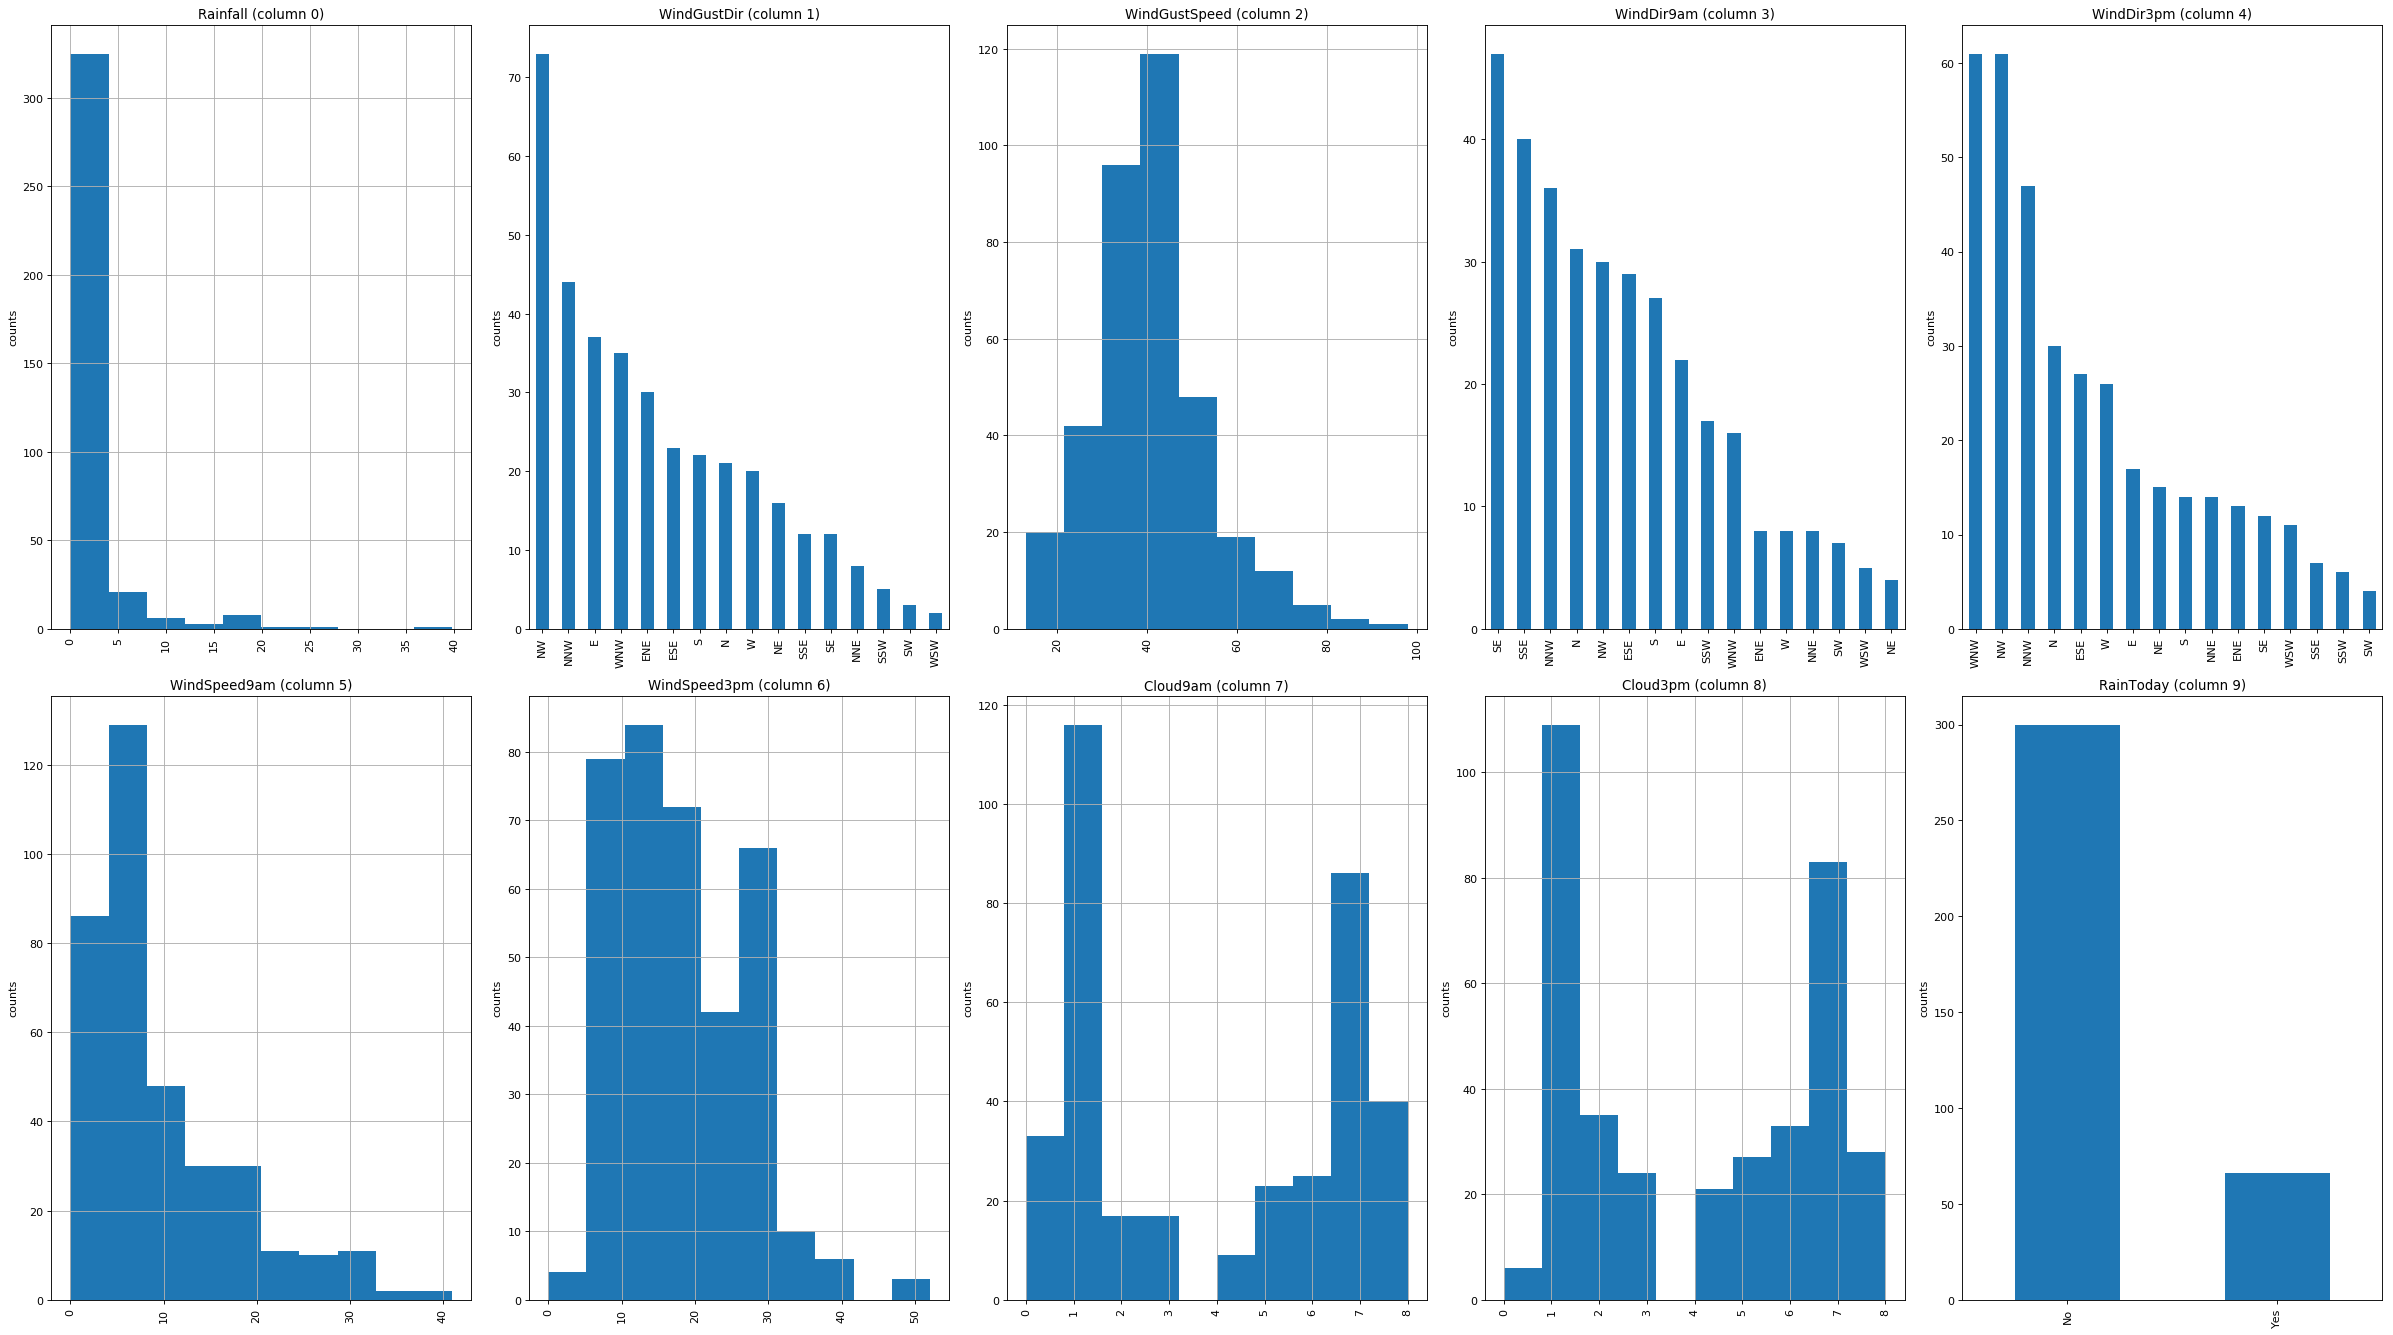

In [16]:
plotPerColumnDistribution(weather_df, 10, 5)

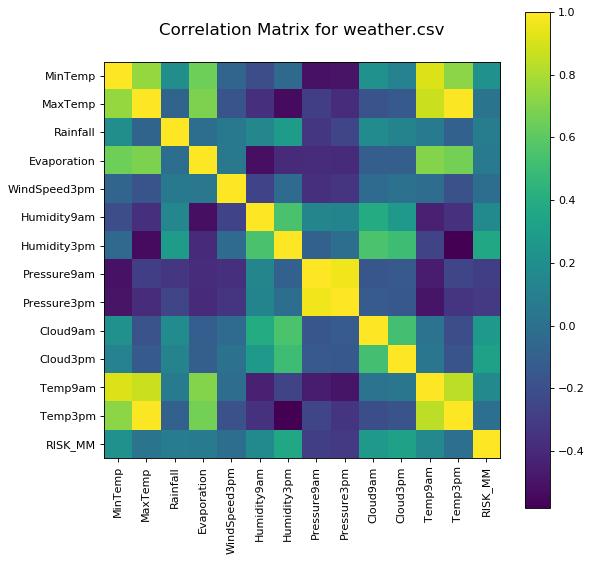

In [23]:
plotCorrelationMatrix(weather_df, 8)

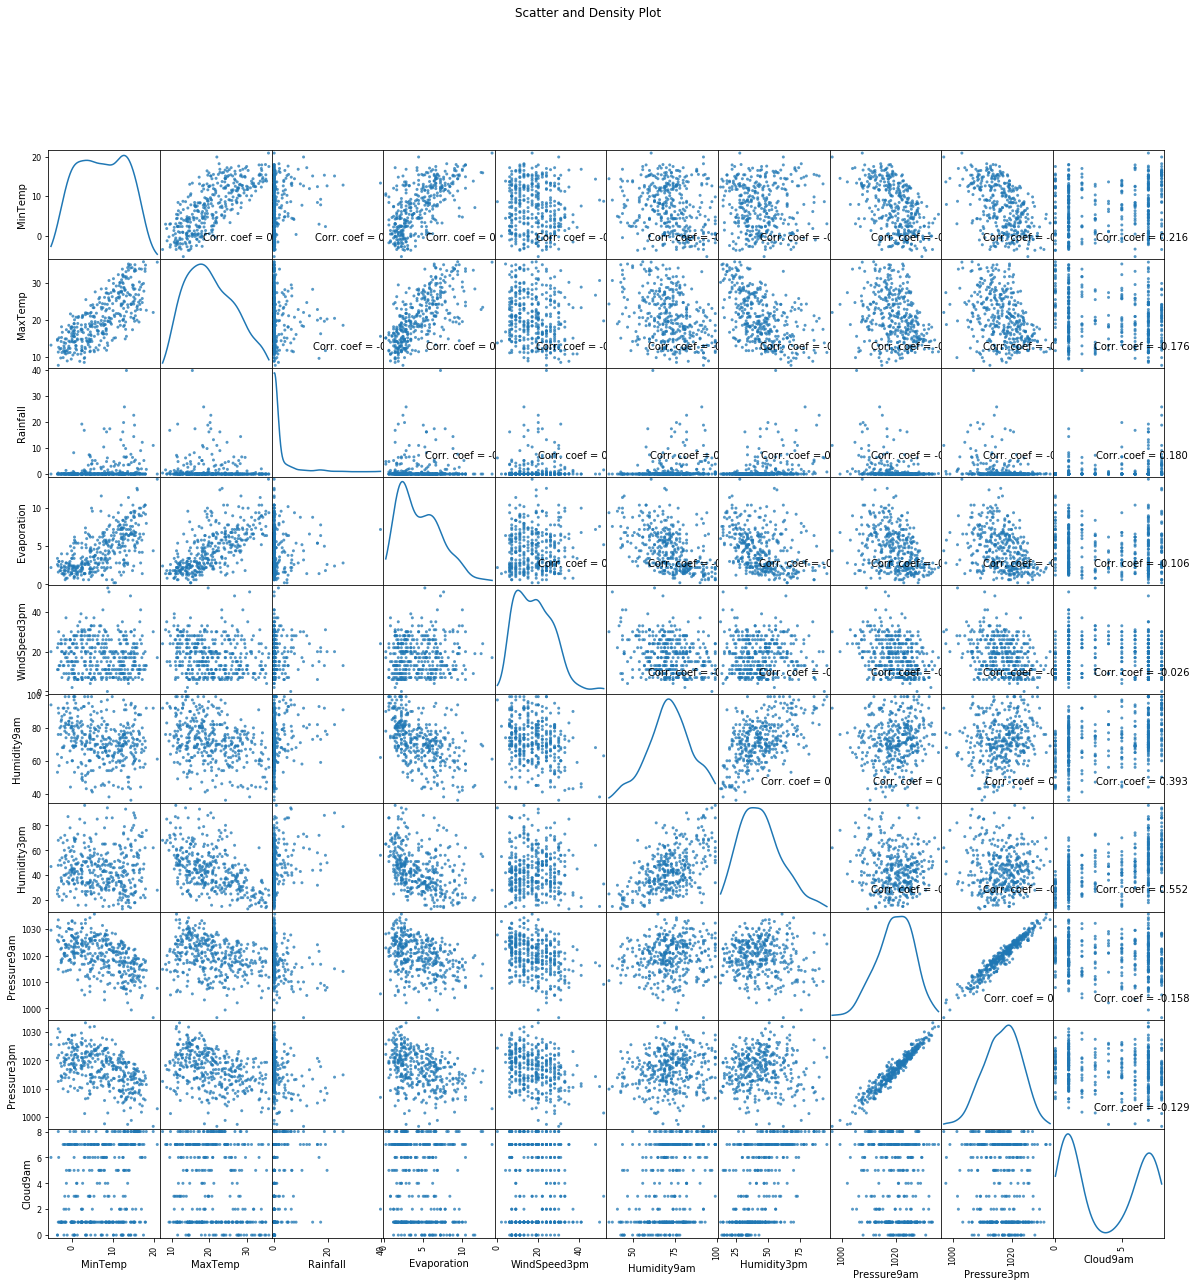

In [32]:
plotScatterMatrix(weather_df, 20, 10)